# 2 Machine Learning Models

## 2.X Gradient Boosting Regression

This notebook runs the Gradient Boosting regression model (an ensemble method where at 'each stage a regression tree is fit on the negative gradient of the given loss function') from the SciKit Learn python library (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor).

The problem posed is to predict electricity consumption at a local (LSOA) level, the data is therefore continuous and numerical and is labelled. This lends to supervised machine learning (ML) and regression models.

It is hypothesised that there will be a correlation between mean house price sales (as an indicator of general prosperity and condition of a property) and electricity consumption. This data has previously been cleaned, is read in and split into training and test data. Results are printed in line and exported to csv for comparison against other regression models.

The feature variables include: 'Year', 'Mean price paid', and OS coordinate location data for the population weighted centroid of the LSOAs.

Initially the models were tested with 'Year' and 'Mean price paid', followed by a second model run with all the above feature variables included.

Random Forest has several hyperparameters that are used to refine the model. The hyperparameters varied within the below model runs are:

Number of estimators - which is the number of trees in the forest, the default is set to 100 and increasing substantially has a knock on to run time.
Criterion - whether the model averages based on MSE or MAE. MSE is substantially faster, with MAE throwing runtime and memory issues. Whilst MAE could be a better predictor this has therefore not been explored.
Maximum depth of the tree - aka number of branches - the default is none with the model running until pure.
Random State - randomness of samples taken and also randomness of features considered at each node / branch. It is not known what effect this will on the model.
All other hyperparameters are not specified and set to the default values.

## 2.3.1 Import Model Libraries

Data handling and scientific libraries used include:

numpy - (scientific numerical package for Python that enables working with arrays) pandas - (data analysis library) matplotlib - (enables plotting and visualisation in Python) openpyxl / load_workbook (opens Excel xlsx files)

In [57]:
#Import Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from openpyxl import load_workbook

Imports the Gradient Boosting Regressor model from the SciKit Learn ensemble library.

In [59]:
#Import ML models

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import ElasticNet
#from sklearn.linear_model import HuberRegressor
#from sklearn.linear_model import Lars
#from sklearn.linear_model import LassoLars
#from sklearn.linear_model import PassiveAggressiveRegressor
#from sklearn.linear_model import RANSACRegressor
#from sklearn.linear_model import SGDRegressor

#from sklearn.ensemble import AdaBoostRegressor
#from sklearn.neural_network import MLPRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.neighbors import KNeighborsRegressor


Imports the standard error metric functions of Variance (explained variance), MAE, MSE and R2 from the SciKit Learn library.

Explained variance is an indicator of whether the model is accounting for the variance in the dataset.

MAE - is the real error averaged across the predicted values.

MSE - is the square of the mean error, which indicates risk and the quality of the prediction. Values closer to zero are better.

R squared or R2 'represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.'1 An R2 value closer to 1 indicates a good fit.

1 - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [61]:
#Import Error Metrics

In [62]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [63]:
#Import Test/Train split function

In [64]:
from sklearn.model_selection import train_test_split

## 2.3.2 Import Data & Split into Train/Test Data

The train_test_split function allows you to defined test_size and train_size, if one isn't specified it is set as the complementary value.

A training size of 0.75-0.8 is generally recommended. Sensitivity testing to the training size showed continuous improvement with a larger training size. Beyond 80% of the data for training may lead to overfitting hence selection at this point.

Defining the random_state with an integer allows repetition across different Notebooks/model runs.

In [65]:
#Read in datafile

In [66]:
df_LSOA_Location_Energy_Sales = pd.read_csv('1_DataCleaning/LSOA_Location_Energy_Sales.csv')

In [67]:
#Split df_LSOA_Location_Energy_Sales dataset 80:20

In [68]:
train, test = train_test_split(df_LSOA_Location_Energy_Sales, test_size=0.2, train_size=0.8, random_state=10)

## 2.3.3 Model Set-up, Training, Prediction & Evaluation

The model function undertakes the following steps:

1. The model is defined, taking the feature variables and hyperparameters as arguments.

2. The model is trained using .fit on the specified training data.

3. The model is run using .predict on the feature variables.

4. Evaluation metrics are printed to screen, stored in a dataframe and plotted (against number of neighbors).

The function returns the dataframe of evaluation metrics.

In [69]:
max_depth = [5, 10, 15, 20, 25, 30, 35, 40]

In [70]:
def GradientBoosting(feature_variables, loss, learning_rate, n_estimators, criterion, max_depth, random_state):
         
    #Define empty dataframe
    df_Results = None
    
    #Fit & Run model
    for d in max_depth:
        #Define the model
        regr = GradientBoostingRegressor(loss=loss, learning_rate=learning_rate, n_estimators=n_estimators, criterion=criterion, max_depth=d, random_state=random_state)
        
        #Set the training data
        x_train = np.asanyarray(train[feature_variables])
        y_train = np.asanyarray(train[['Mean_domestic_electricity_consumption_kWh_per_meter']])
        
        #Train the model on the set training data
        regr.fit(x_train, y_train.ravel())
        
        #Predict results using the trained model and the previously defined test data
        y_hat = regr.predict(test[feature_variables])
    
        x_test = np.asanyarray(test[feature_variables])
        y_test = np.asanyarray(test[['Mean_domestic_electricity_consumption_kWh_per_meter']])
        
        #Check the shape of the data
        y_test = np.squeeze(y_test)
        y_test.shape
        
        #Run evaluation metrics to check the model performance & print results to notebook
        print("GradientBoosting: max_depth=%.2f" % d, feature_variables)
        print("Explained Variance Score: %.2f" % explained_variance_score(y_test, y_hat))
        print("MAE: %.2f" % mean_absolute_error(y_test, y_hat))
        print("MSE: %.2f" % mean_squared_error(y_test, y_hat))
        print("R2-score: %.2f" % r2_score(y_test, y_hat))
        print(" ")
        
        #Plot the results
        #plt.figure()
        #plt.scatter(x_test, y_test, s=5, edgecolor="black", c="black", label="data")
        #plt.plot(x_test, y_hat, color="cornflowerblue", label="max_depth=%.2f" % d, linewidth=1)
        #plt.xlabel("data")
        #plt.ylabel("target")
        #plt.title("Decision Tree Regression")
        #plt.legend()
        #plt.show()
        
        #Set up temporary results df
        df = None
        df = pd.DataFrame({'Explained Variance Score': [explained_variance_score(y_test, y_hat)]},
                  index=["GradientBoosting: max_depth=%.2f" % d])
        df.insert(1,'MAE', mean_absolute_error(y_test, y_hat))
        df.insert(2,'MSE', mean_squared_error(y_test, y_hat))
        df.insert(3,'R2_score', r2_score(y_test, y_hat))
        df.insert(0, 'Model', 'GradientBoosting')
        df.insert(1, 'max_depth', d)
        df.insert(2, 'Feature Variables', [feature_variables])                          
        
        #Add each df to master df
        if df_Results is None:
            df_Results = df
        else:
            df_Results = pd.concat([df_Results, df], axis=0)                   
    
    #Plot learning curve of R2_score
    plt.scatter(df_Results.max_depth, df_Results.R2_score)
    plt.xlabel("max_depth")
    plt.ylabel("R2_score")
    plt.title("Gradient Boosting Learning Curve - R2")
    plt.show()

    #Plot learning curve of MAE
    plt.scatter(df_Results.max_depth, df_Results.MAE)
    plt.xlabel("max_depth")
    plt.ylabel("MAE")
    plt.title("Gradient Boosting Learning Curve - MAE")
    plt.show()
    
    return df_Results       
    

## 2.3.3.1 - Model Training & Evaluation (Feature Variables = Mean Price Paid, Year)

In the first instance 'Year' and 'Mean Price Paid' are selected as feature variables to predict 'Mean_domestic_electricity_consumption_kWh_per_meter'.

This model is expected to predict with a better fit relatively than the linear models where either 'Year' or 'Mean Price Paid' were taken as the sole feature variable as plotting of the data shows a (weak) positive correlation. From the previous simple linear model runs it is expected that 'Mean Price Paid' is the more dominant feature variable, but there is expected to be some degree of annual correlation that together could provide a better fit model.

The Gradient Boosting algorithm may be better at handling the variance in the data set but is still not expected to have an objectively good fit when only the above two feature variables are selected.

As many factors affect electricity consumption it is expected that either a greater number of feature variables (or a model better able to deal with variance/complexity in the data) will provide a better fit. Noting that Random Forest is hypothesized to be one of the algorithms better able to fit to the dataset.

Gradient Boosting has several hyperparameters that are used to refine the model. The hyperparameters varied within the below model runs are:

1. Number of estimators - which is the number of trees in the forest, the default is set to 100 and increasing substantially has a knock on to run time.
2. Criterion - whether the model averages based on MSE or MAE. MSE is substantially faster, with MAE throwing runtime and memory issues. Whilst MAE could be a better predictor this has therefore not been explored.
3. Maximum depth of the tree - aka number of branches - the default is none with the model running until pure. The below runs through a series of model runs over a range of max_depth between 5 to 30, and none, to determine which max_depth provides the best fit model.
4. Random State - It is not known the impact of this hyperparameter so a series of runs have again been trialled, on this occasion set to zero.

All other hyperparameters are not specified and set to the default values.

In [71]:
max_depth = [5, 10, 15, 20]

GradientBoosting: max_depth=5.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.29
MAE: 502.26
MSE: 544044.45
R2-score: 0.29
 
GradientBoosting: max_depth=10.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.28
MAE: 504.67
MSE: 550486.74
R2-score: 0.28
 
GradientBoosting: max_depth=15.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.25
MAE: 515.00
MSE: 575616.01
R2-score: 0.25
 
GradientBoosting: max_depth=20.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.18
MAE: 538.03
MSE: 626635.83
R2-score: 0.18
 


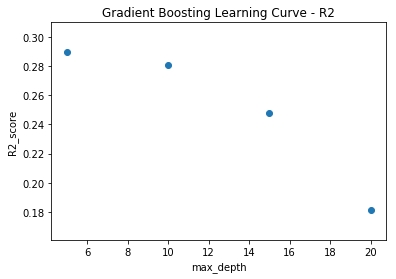

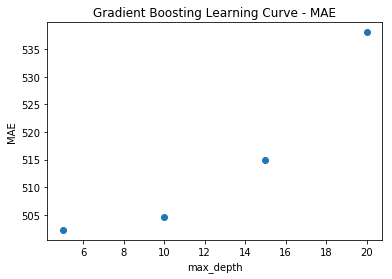

In [72]:
df_Results_1 = GradientBoosting(['Mean_price_paid','Year'], 'ls', 0.1, 100, 'friedman_mse', max_depth, 0)

In [73]:
df_Results_1

,Model,max_depth,Feature Variables,Explained Variance Score,MAE,MSE,R2_score
GradientBoosting: max_depth=5.00,GradientBoosting,5,"[Mean_price_paid, Year]",0.289309,502.261023,544044.447360,0.289309
GradientBoosting: max_depth=10.00,GradientBoosting,10,"[Mean_price_paid, Year]",0.280893,504.670381,550486.739724,0.280893
GradientBoosting: max_depth=15.00,GradientBoosting,15,"[Mean_price_paid, Year]",0.248066,515.000579,575616.014255,0.248066
GradientBoosting: max_depth=20.00,GradientBoosting,20,"[Mean_price_paid, Year]",0.181419,538.034831,626635.827955,0.181419


Explained Variance - peaks at 0.289 with a max_depth of 5. This is higher than achieved over the linear or kNN algorithms. But the model still does not deal with the variance in the model.

MAE - the MAE is marginally improved over the equivalent kNN model runs and linear models.

MSE - is still high, reflecting a high risk of a low quality prediction.

R2 - is 0.289, demonstrating the model 'fit' is still poor.

CONCLUSION:

Overall the Random Forest algorithm with feature variables of 'mean price paid', 'year', performs best overall compared to kNN and linear model equivalent runs. A max_depth of 5 appears to provide the optimum achievable fit with these feature variables.

However, an R2 score of 0.287 and a MAE of still >10% compared to the mean for the data set is still not a good enough fit to use the model in earnest. Further improvements through further model refinments, additional possible feature variables or alternative models would be required.

In [74]:
#Export results to csv

In [75]:
df_Results_1.to_csv('2_ModelResults/GradientBoosting_Results_1.csv')

## 2.3.3.2 - Model Training & Evaluation (Feature Variables = Mean Price Paid, Year, X, Y)

Location as a feature variable is expected to improve the model and support better management of the variance in the data set.

Location is denoted by two feature variables 'X' and 'Y' which represent the X, Y OS Coordinates of the population weighted centroid for each LSOA. Both are therefore implemented within the same model run.

Gradient Boosting has several hyperparameters that are used to refine the model. The hyperparameters varied within the below model runs are:

1. Number of estimators - which is the number of trees in the forest, the default is set to 100 and increasing substantially has a knock on to run time.
2. Criterion - whether the model averages based on MSE or MAE. MSE is substantially faster, with MAE throwing runtime and memory issues. Whilst MAE could be a better predictor this has therefore not been explored.
3. Maximum depth of the tree - aka number of branches - the default is none with the model running until pure. The below runs through a series of model runs over a range of max_depth between 5 to 30, and none, to determine which max_depth provides the best fit model.
4. Random State - It is not known the impact of this hyperparameter so a series of runs have again been trialled, on this occasion set to zero.

All other hyperparameters are not specified and set to the default values.

In [76]:
max_depth = [5, 10, 15, 20]

GradientBoosting: max_depth=5.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.60
MAE: 388.22
MSE: 303979.77
R2-score: 0.60
 
GradientBoosting: max_depth=10.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.75
MAE: 314.24
MSE: 193128.18
R2-score: 0.75
 
GradientBoosting: max_depth=15.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.82
MAE: 262.55
MSE: 140663.86
R2-score: 0.82
 
GradientBoosting: max_depth=20.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.78
MAE: 273.16
MSE: 167995.90
R2-score: 0.78
 


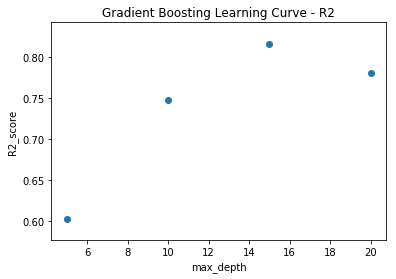

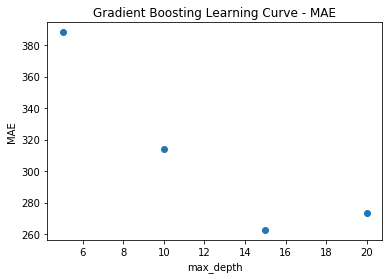

In [77]:
df_Results_2 = GradientBoosting(['Mean_price_paid','Year', 'X', 'Y'], 'ls', 0.1, 100, 'friedman_mse', max_depth, 0)

In [78]:
df_Results_2

,Model,max_depth,Feature Variables,Explained Variance Score,MAE,MSE,R2_score
GradientBoosting: max_depth=5.00,GradientBoosting,5,"[Mean_price_paid, Year, X, Y]",0.602908,388.224687,303979.771612,0.602908
GradientBoosting: max_depth=10.00,GradientBoosting,10,"[Mean_price_paid, Year, X, Y]",0.747722,314.240222,193128.178290,0.747714
GradientBoosting: max_depth=15.00,GradientBoosting,15,"[Mean_price_paid, Year, X, Y]",0.816281,262.550422,140663.861063,0.816249
GradientBoosting: max_depth=20.00,GradientBoosting,20,"[Mean_price_paid, Year, X, Y]",0.780600,273.164482,167995.896328,0.780545


Explained Variance - peaks at 0.816 with max_depth of 15. This is higher than achieved over the linear or kNN algorithms and the earlier Random Forest model run without the location parameters. The model is dealing much better with variance.

MAE - the MAE is significantly improved over the equivalent kNN model runs and linear models and predicts within ~7% of the mean electricity consumption for the data set.

MSE - is also improved, but arguably still high with the possibility of a poor prediction.

R2 - also appears to peak at 0.816, demonstrating the model 'fit' is relatively 'good' - albeit improvements would still be looked for.

CONCLUSION:

Overall the Gradient Boosting algorithm with feature variables of 'mean price paid', 'year', 'X' and 'Y' performs best overall compared to all other model runs. A max_depth of 15 appears to provide the optimum achievable fit with these feature variables.

The model is substantially improved compared to earlier algorithm/model choice and runs (differing feature variables and hyperparameters) but further improvements would still be looked for through addition of other possible feature variables and tuning of hyperparameters.

In [79]:
#Export results to csv

In [80]:
df_Results_2.to_csv('2_ModelResults/GradientBoosting_Results_2.csv')

In [81]:
regr.feature_importances_

array([0.15726708, 0.03625983, 0.39868883, 0.40778426])

In [ ]:
#END